# Exploratory Analysis of GTD 

In [129]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
gtd = pd.read_excel('globalterrorismdb_0616dist.xlsx')

In [3]:
gtd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156772 entries, 0 to 156771
Data columns (total 137 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              float64
longitude             float64
specificity           int64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             float64
alternative           float64
alternative_txt       object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           float64


In [11]:
# pd.unique(gtd.gsubname)
pd.set_option('display.max_columns', 137)
gtd.iloc[:5, :137]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,23rd of September Communist League,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,19

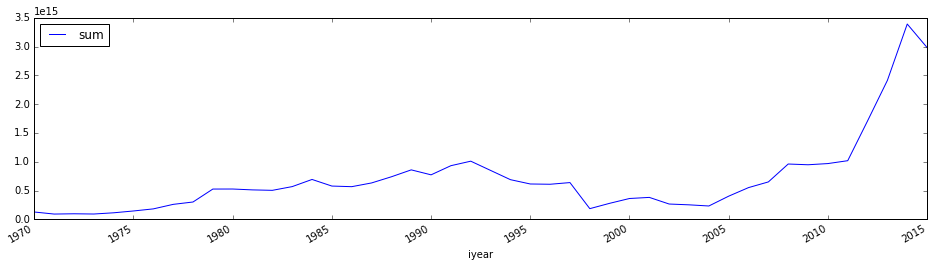

In [65]:
# temp = 
gtd.groupby(['iyear']).eventid.agg([np.sum]).plot(subplots = True,figsize=(16,4))
plt.show()

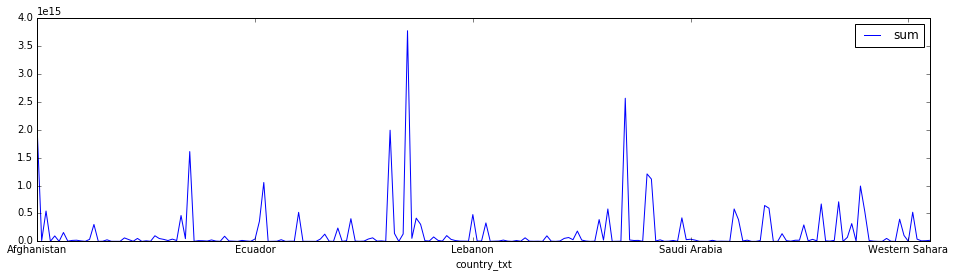

In [127]:
gtd.groupby(['country_txt']).eventid.agg([np.sum]).plot(figsize=(16,4))
plt.show()

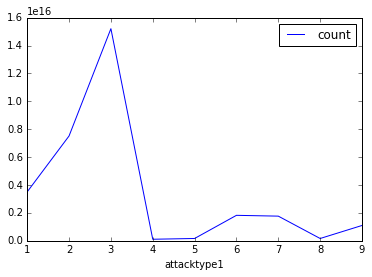

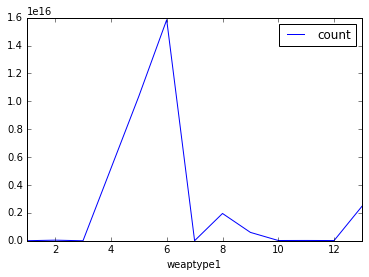

In [123]:
gtd.groupby(['attacktype1']).eventid.agg({'count':sum}).plot()
gtd.groupby(['weaptype1']).eventid.agg({'count':sum}).plot()

In [124]:
# gtd.groupby(['iyear', 'country_txt'])[['eventid']].sum()

## Feature Engineering

## Prediction

In [128]:
X, y = gtd[['weaptype1', 'attacktype1']], gtd.gname

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
X_train.shape, y_train.shape

((125417, 2), (125417,))